In [1]:
import os
import string
import pandas as pd
from movie.iter0 import set_dir_moviedata
from movie.simulation_test import make_consistent_title
import numpy as np
from imdb import Cinemagoer
# import os
# os.chdir(os.getcwd() + "/data/movie")
# test data: old_movie = pd.read_pickle('data/movie/old_movie.pkl')
#set_dir_moviedata()
#make_consistent_title(frac =1)

In [2]:
from movie.iter import sel_title, sel_year, sel_region_type, sel_rows_random, join_movie, save_iter, compare_mental_material

ITER0 COMPLETE                                         title    year
1442752                       Sticky Business  1987.0
2352662                            The E.N.D.  2005.0
446218                          Schone schijn  1999.0
1532655                               (#1.65)  1996.0
1922701  History Undercover: The Doomsday Flu  1998.0
...                                       ...     ...
999768                               Tragédia  2011.0
963961                       En riktig hjälte  1996.0
659272                               Blackout  2004.0
2096062                             King Coal  1977.0
694236                           (2003-07-15)  2003.0

[2545531 rows x 2 columns]              titleId                                 title  year region  \
4691999   tt14858816                               Pílades  2016     ES   
11143687   tt9104250                          Episode #1.4  2018    NaN   
7446563    tt2386850                           Ambros pur!  2007     AT   
1509522  

/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/src/iter.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year = df.year.astype('int')
/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/src/iter.py:75: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'year'] = df.year.apply(lambda x: int(x) if str(x).isnumeric() else -1)


############
10766293
############
8203504
###### ITER1 COMPLETE
from merged table, only old's `titleId` is na, only new's `old_id`is na              titleId                     title  year region  titleType
4691999   tt14858816                   Pílades  2016     ES      video
11143687   tt9104250              Episode #1.4  2018    NaN  tvEpisode
7446563    tt2386850               Ambros pur!  2007     AT      video
1509522    tt0940805  Jami Floyd: Best Defense  2006     US   tvSeries
9375697    tt5866370                  Daughter  2016     IR      short
...              ...                       ...   ...    ...        ...
7066134    tt2203613    Zhenshhina moej mechty  2005    NaN  tvEpisode
44         tt0000020            The Derby 1895  1895     GB      short
1949432   tt10566536           Episode #1.1280  2015    NaN  tvEpisode
3329006   tt12720436           Episode #1.6451  1981    NaN  tvEpisode
5866423   tt17424226          Der erste Urlaub  2019    NaN  tvEpisode

[10257475 

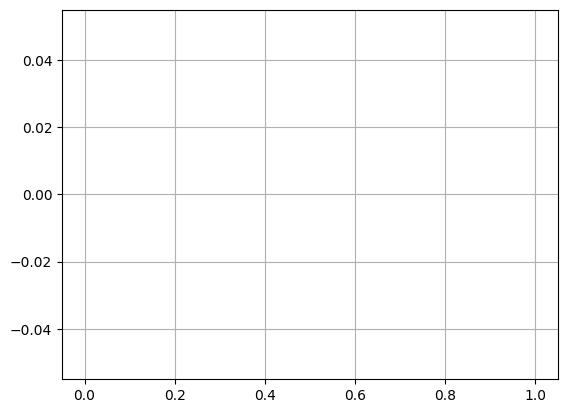

In [3]:
make_consistent_title(IS_PKL = False, IS_SAVE= False,  frac =1)
#merged_title_iter1 = pd.read_pickle("merged_title_iter1.pkl")

In [16]:
mo = pd.read_csv("mo_1207.tsv", sep = '\t') # drop

/var/folders/9z/bf6qfjvd695cjkj7s4ss1cxh0000gn/T/ipykernel_32770/1823508363.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mo = pd.read_csv("mo_1207.tsv", sep = '\t') # drop


In [7]:
mo

,Unnamed: 0,old_id,title,year,titleId,region,titleType
0,0,OLD1442752,Sticky Business,1987,tt0819407,US,tvEpisode
1,1,OLD2352662,The E.N.D.,2005,tt1437268,US,movie
2,2,OLD2352662,The E.N.D.,2005,tt1437268,\N,movie
3,3,OLD446218,Schone schijn,1999,tt0575194,NaN,tvEpisode
4,4,OLD1922701,History Undercover: The Doomsday Flu,1998,tt0414103,US,tvMovie
...,...,...,...,...,...,...,...
10766288,10766288,NaN,Blindfolded Pizza Challenge,2014,tt5524856,NaN,tvEpisode
10766289,10766289,NaN,Einfach leben - glücklich leben?,2004,tt20453860,NaN,tvEpisode
10766290,10766290,NaN,Louis Riddick/Josh Allen,2020,tt13727222,NaN,tvEpisode
10766291,10766291,NaN,Episode #1.6451,1981,tt12720436,NaN,tvEpisode


In [9]:
mo_dup = mo[mo.duplicated(subset=['old_id', 'titleId'])]
# mo.drop_duplicates(subset=['old_id', 'titleId'], keep='first', inplace=True, ignore_index=True)

In [10]:
mo_dup[mo_dup.title == 'Ajeossi']

,Unnamed: 0,old_id,title,year,titleId,region,titleType
1191284,1191284,OLD1687553,Ajeossi,2010,tt1527788,SE,movie
1191285,1191285,OLD1687553,Ajeossi,2010,tt1527788,AE,movie
1191286,1191286,OLD1687553,Ajeossi,2010,tt1527788,KR,movie
1191287,1191287,OLD1687553,Ajeossi,2010,tt1527788,IN,movie
1191288,1191288,OLD1687553,Ajeossi,2010,tt1527788,CA,movie


In [17]:
mo1 = mo.drop_duplicates(subset=['old_id', 'titleId'], keep='first', inplace=True, ignore_index=True)

In [18]:
mo1

In [14]:
mo1[mo1.title == 'Ajeossi']

AttributeError: 'NoneType' object has no attribute 'title'

In [5]:
mo_eng_us_movie = sel_region_type(sel_title(merged_title_iter1, 1, characters = ['Pilot', 'Finale'])) # 169k -> 65879
mo_eng_us_movie.shape[0]

65879

In [6]:
mo_eng_us_movie

,index,old_id,title,year,titleId,region,titleType
16,16,OLD2439135,The Man Behind the Door,1914,tt0005692,US,movie
19,19,OLD2209006,Safe House,1999,tt0183734,US,movie
76,76,OLD1885719,Diary of a Co-Worker,2005,tt0490892,US,movie
151,151,OLD2479214,The Red Lane,1920,tt0011616,US,movie
247,247,OLD2176487,Love from Paris,1970,tt0143480,US,movie
...,...,...,...,...,...,...,...
8199548,8199548,NaN,Lady Hyde,2022,tt21001736,US,movie
8199889,8199889,NaN,The Girlfriend Project,2022,tt6385442,US,movie
8200049,8200049,NaN,One Cent Can't Change,2022,tt18311364,US,movie
8202123,8202123,NaN,Bundles the Movie,2022,tt21854866,US,movie


In [7]:
mo_eng_us_movie[mo_eng_us_movie.titleId.isnull()]

,index,old_id,title,year,titleId,region,titleType


In [8]:
mo_eng_us_movie[mo_eng_us_movie.old_id.isnull()]

,index,old_id,title,year,titleId,region,titleType
1814411,1814411,NaN,For the Birds,2016,tt6017950,US,movie
1814414,1814414,NaN,The Arab Americans,2015,tt2369365,US,movie
1814559,1814559,NaN,Valerian and the City of a Thousand Planets,2017,tt2239822,US,movie
1814713,1814713,NaN,Love of a Lifetime,2017,tt4478324,US,movie
1817523,1817523,NaN,The Callback,2021,tt13539840,US,movie
...,...,...,...,...,...,...,...
8199548,8199548,NaN,Lady Hyde,2022,tt21001736,US,movie
8199889,8199889,NaN,The Girlfriend Project,2022,tt6385442,US,movie
8200049,8200049,NaN,One Cent Can't Change,2022,tt18311364,US,movie
8202123,8202123,NaN,Bundles the Movie,2022,tt21854866,US,movie


In [9]:
merged_title_eng_us_movie = pd.read_pickle("merged_title_eng_us_movie.pkl")

In [10]:
pd.read_pickle("only_old_title.pkl")

,index,old_id,title,year,titleId,region,titleType,soft_eng


In [11]:
os.getcwd()

'/Users/hyunjimoon/Dropbox/tolzul/BayesSD/ContinuousCode/3_Data4DM/empirical_dynamics/cont_code/data/movie'